# Modelling of the impact of social tracing apps: a contact network model

by Alexandre Variengien, Simon Dupouy, Guilhem Niot, Timothé Picavet and Pierre Marrec.

contact : [alexandre.variengien@ens-lyon.fr]

We wish to thank the _Soyez Prevenus_ team for proposing and organising this modelling challenge !

**An online interactive version of this document is available [here](https://mybinder.org/v2/gh/GuilhemN/covid-19-tracing-app-modelling/master?filepath=model.ipynb)**
### Context of creation

This model was created during the "Hack COVID19" Hackathon, which took place between the 10th and the 12th of April and was organized by HEC and l'École Polytechnique.
It was created to model the impact of the adoption of a social tracing app like STOP COVID in France on the spread of the pandemic.
Its primary goal is to show the influence of parameters such as the proportion of users using the app in the global population or the account of the applicaiton notification: after a suspected transmission is notified by the app, will a citizen choose to directly quarantine himself?

### Motivation

We are students in computer science at the ENS de Lyon, so we aren't experts in the field of epidemiology. This model doesn't aim to provide precise predictions for the future of the pandemic.
However, it is easily understandable and still reasonnably effective to get an overall sense of what we could expect from a social tracing app.
More specifically, it gives a good intuition about the impact a social tracing app may have on the epidemic depending on the adoption rate of the app.
You may try changing the parameters to convince yourself that targeted quarantining of suspected cases can lead to a great limitation of the spread - if it is well adopted by the population.
So feel free to play with our model!

### Bibliography

Contact network epidemiology is a paradigm to modelize an epidemic, it has been widely studied and it can account for the discrepency of transmission between individuals.
It has been discussed that this approach is suited to model an epidemic as SARS-CoV-1 in [1].
Moreover, the structure of the chosen graph has a great impact on the final extent of the outbreak, as discussed in [2].
We chose two models for the graph:
- a model using an exponential law for the degrees distribution - which seems suited for a disease such as SARS in urban areas [3]
- a method from [3] for building the network by stages: first we build highly connected households, then the connections between them.

As for the epidemiological parameters of the disease, we adapted parameters from [4] to be suited for our model.
Also, other models for the impact of a social tracing app have been proposed such as in [4] and [5].

### The model

Each vertex of the graph is an individual that can be : Healthy, Asymptomatic, Presymptomatic, Symptomatic, Dead or Recovered.
At each step we go trough all the edges and with the probability given by these edges, there is a contact between the individuals.
There is a parameterized proportion of close contact which are likely to propagate the virus and of being detected by the app, whereas further contact are less likely to propagate the virus but are not detected by the app. The last type of contact models evironnemental contamination by surfaces for example.

The model implements several policies based on screening when an individual gets symptoms:
- Warning after symptoms:
    * If choosen, the app sends notifications to the persons the infected individual met in the past 14 days as soon as the symptoms are detected. To be more realistic, in this case, non infected individuals may also send notifications at random to modelize other diseases with similar symptoms.
    * If not, the individual pass a screening test and notifications are only sent if the test is positive (the result is only available after a predefined number of days, which is approximately 5 days for now in France).

- Quarantine after notification:
    * If choosen, individuals receiving a notification go in quarantine directly (if they choose to compell to the app). They pass a screening test and stop the quarantine if it turns out to be negative.
    * If not choosen, individuals receiving a notification wait until they get the result of their test before going in quarantine.

### Limits of the model

 * Some parameters like the proportion of asymptomatic persons and their infectiosity is not well known. While our work is based on their latest evaluation, they may be reevaluated quite differently in a few days or weeks.

 * We don't take into account the eventual false positives of nasal tests. We consider here that there are none.

 * The variability of infectiousness seems to be really high: an infected person that will develop symptoms is really contagious during the 2 days before the symptoms appear and is less contagious the 4 days after the symptoms appear, according to [6]. This could moderate our conclusions about the validity window in the "results" part as it gives us 2 to 3 free day during the incubation period.

 * The geographical heterogeneity of a nationnal territory is not taken into account, this is a simulation just for one isolated community

 * In the initial state a proportion of the population (5%) is contaminated at the same time. In reality, after the end of the lockdown the infected will have been contaminated at different instant, smoothing the pressure on healthcare systems.
 
 * The distribution of the time spend asymptomatic and symptomatic follows a geometrical law. In reality it seems that they are more close to a normal or lognormal distribution. However, beacause symptomatics are quarantined and asymptomatic are not the most infectious, this biais should not impact to much the dynamic of the epidemic.

### Key takeaways

 * The contaminations which are the most determining and which can be avoided by social tracing are the presymptomatic ones. To do so, the duration of the signaling chain must be less than the 5 days incubation period.
 * Even with quicker and more precise screening, the app seems unlikely to be effective because of the validity window of nasal tests.
 * The advice of quarantining upon recieving a notification, especially for recent contact, can be a response to this issue but at a high social and economic cost.
 * The "warning after symptoms" policy can be useful to get around the testing delays of symptomatic people if those are longer than 2/3 days. For this, though, we need to precisely identify COVID-19 symptoms and distinguish them from similar symptoms of other diseases.
 * The proportion of users of the app in the population is a central parameter. Under 20% of users, the effects of the app are insignificant, even in a best case scenario. In reality, depending on the policies adopted this threshold could be much higher.

### References

* [1] Contact network epidemiology: Bond percolation applied to infectious disease prediction and control, Lauren Ancel Meyers [(link)](https://www.ams.org/journals/bull/2007-44-01/S0273-0979-06-01148-7/S0273-0979-06-01148-7.pdf)
* [2] Contact Network Epidemiology: Mathematical Methods of Modeling a Mutating Pathogen on a Two-type Network by Robert L. Seilheimer [(link)](https://repositories.lib.utexas.edu/bitstream/handle/2152/13376/Seilheimer_-_M_08.pdf)
* [3] Network theory and SARS: predicting outbreak diversity by Lauren Ancel Meyers & al. [(link)](https://doi.org/10.1016/j.jtbi.2004.07.026)
* [4] Quantifying SARS-CoV-2 transmission suggests epidemic control with digital contact tracing. - PubMed - NCBI [(link)](https://science.sciencemag.org/content/sci/early/2020/04/09/science.abb6936.full.pdf)
* [5] The Impact of Contact Tracing in Clustered Populations by Thomas House & Matt J Keeling [(link)](https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1000721&type=printable)
* [6] Temporal dynamics in viral shedding and transmissibility of COVID-19 by Xi He & al [(link)](https://www.nature.com/articles/s41591-020-0869-5)
* [7] Clinical characteristics of 24 asymptomatic infections with COVID-19 screened among close contacts in Nanjing, China by Zhiliang Hu & al [(link)](https://link.springer.com/article/10.1007/s11427-020-1661-4)
* [8] Report of the WHO-China Joint Mission on Coronavirus Disease 2019 (COVID-19) [(link)](https://www.who.int/docs/default-source/coronaviruse/who-china-joint-mission-on-covid-19-final-report.pdf)


### Graph visualisation

Our model is based on a graph simulation: we show a visualisation of the spread of the epidemic in the contact network.
The contact network is organised in households (little groups of 2 to 6 nodes packed together). The members of a household have a greater probability of contact between them than with members of different households.

Here is the initial state:
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/init_state.png" alt="init state" style="width: 500px;"/>

Color correspondence:


| Color     | Meaning                    |
| :-------: | :------------------------: |
| Green     | healthy                    |
| Red       | infected without symptoms  |
| Pink      | infected with symptoms     |
| Blue      | cured                      |
| Black     | dead                       |

Let's see what happens when nobody installs the app.

Day 20:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_20_noapp.png" alt="no app, day 20" style="width: 500px;"/>

After 50 days, almost everyone has been infected (because almost everyone is cured):

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_50_no_app.png" alt="no app, day 50" style="width: 500px;"/>

Note that these visualisations are just meant to illustrate the model. In the "Results" section, we used another inital state and experimented different policies.

The graph visualisations were made with Gephi and the Force Atlas 2 algorithm.

### Detailed results

#### Baseline case: no contact tracing
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/0%25%2C-%2C-%2C[3%2C10]%2C5j%2C0.3.png" alt="no contact tracing" style="width: 500px;"/>

The epidemic spreads freely from the 5% initial infected rate until almost all the population gets infected.
The initial Rt (R0) (red curve) is a bit lower than 2 because in the initial population, 10% of the individuals are cured and because people who suffer of symptoms directly quarantine themselves.
This was not the case at the beginning of the outbreak when R0 was evaluated around 2.

We will take this graph as reference for further analysis.

#### Influence of the waiting time for tests results

We use these test parameters to model the current test abilities in France:
 * 5 days to wait for test results
 * a 3 to 10 days validity window
 * 30% of false positives

Even with a great adoption of the app the population (80%), no change in the way the epidemic spreads is visible because of the test delay.
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2C-%2C-%2C[3%2C10]%2C5j%2C0.3.png" alt="current testing params in France, 80% adoption" style="width: 500px;"/>

In fact, the critical time period to keep in mind to curb the spread of the disease is the 5 days incubation period.  
According to the last epidemiological statistics, it seems that asymptomatic people make up to about 40% of the infected people - yet they are the cause of only 6% of infections. [4]
On the opposite, the infectiousness of presymptomatic people appears to be really high [4] [6] - so much so that most contaminations originate from them.
Moreover, when symptoms arise the affected person goes into quarantine. This means that symptomatic transmission is contained if this measure is well respected.  
Thus, presymptomatic contaminations are the most significant, and efforts should focus on them.
To avoid them, it is necessary to identify and quarantine infected people at the beginning of the incubation period. Therefore, a 5 days delay is already too late.

*Note: The spikes every 5 days in test demand are due to the fact that an individual cannot ask for a new test if he is already waiting for results.*

In the case of the current testing abilities in France, the characteristic time is of 2*5=10 days between the suspicions of the first infected person and the quarantining of the person notified and infected by the latter. The quarantine arrives far too late to be effective.

Furthermore, the validity window of nasal tests is a key factor that limits their effectiveness. Even if we succeed in having almost perfect tests (1% of false positives) and results available with no delay, we will not be able to identify and isolate presymptomatic people that just got infected because of the 3-10 days validity window.  
Here is a comparison with and without the validity window:

* with the validity window:
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2C-%2C-%2C[3%2C10]%2C0j%2C0.01.png" alt="with validity window" style="width: 500px;"/>
* without the validity window:
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2C-%2C-%2C[-1%2C100]%2C0j%2C0.01.png" alt="without validity window" style="width: 500px;"/>

With the validity window, we can only identify infected people 3 days after the infection, which is already a significant part of the incubation period.

* with more realistic testing parameters (2 days of delay and 15% of false negative) (still better than current tests) :
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2C-%2C-%2C[3%2C10]%2C2j%2C0.15.png" alt="with better tests" style="width: 500px;"/>

Even with better screening, we can see that the curve of the test requests appears earlier, but the
quarantine curve doesn't change much. This can be explained by the fact that a close contact has a probability of only about 2% of causing a contamination (according to a WHO report in China [8]). This leads to a high test demand from persons that only have a low chance of being infected. Moreover, in the best case, the decision to quarantine is taken 4 days after the infection, also too late.

In these simulations the demand for tests is unrealistically high because we don't add any constraints on test capacity.
We may imagine a more nuanced system to determine if we need a test: the number of notifications received, the presumed infectiousness of the infected person at the time of the contact, the comorbidity factors, etc. This could allow a more precise evaluation of the risk an individual has of getting infected.

#### 'Quarantine after notification' policy

* application of the "quarantine after notification" policy and with current tests
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2CN%2C-%2C[3%2C10]%2C5j%2C0.3.png" alt="quarantine after notification with current tests" style="width: 500px;"/>

It provides a more aggressive response against the epidemic and is proven to be effective even with the current test abilities. However, a great part of its effectiveness is likely to be due to the massive quarantine it causes (80% of the population).  
Notice the oscillations of the number of people in quarantine: when the pandemic first spreads, a great part of the population quarantines itself because of the many notifications received. After testing, a lot of them get negative results and end their quarantine, causing the epidemic to spread again.

* application of "quarantine after notification" and with better tests (2 days of delay and 15% of false negative):
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2CN%2C-%2C[3%2C10]%2C2j%2C0.15.png" alt="quarantine after notification with better tests" style="width: 500px;"/>

The effectiveness of this policy is greater with quicker tests because presymptomatic people get notified earlier.

This is illustrated by the rapid collapse of Rt during the first days (red curve). 
In this case, this policy uses quick testing to get earlier and more efficient quarantines.
With such tests parameters, the average number of quarantine days per person is also reduced as the waiting time for test results is shorter.

However, it should be expected that such a policy comes with a high social cost because of its strict quarantining.
Indeed, because of the great number of close contacts in a day (13 on average), almost all the users of the app would quarantine themselves after the first wave of contaminations.  
This high social cost could hamper the adoption of the app.

A response to this problem can be to send a notification only to earlier contact. Instead of warning all the close contact that happended in the last 14 days when testing positive as we did in all our other simulations, we can warn only the contacts of the 7 last days. 
* application of "quarantine after notification" and with better tests (2 days of delay and 15% of false negative) and notificaiton of contacts in the last 7 days:
 <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%2CN%2C-%2C%5B3%2C10%5D%2C2j%2C0.15_avec_daysNotif_a_7.png" alt="quarantine after notification with better tests" style="width: 500px;"/>

This way, we still warn presymptomatics in the begining of their incubation period without useless qurantine of older contat that, even if they led to an infection, are now symptomatics or asymptomatics.
This lower the timer spent by healthy person in quarantine of 2 days without speeding to much the spread of the virus.

In short, if test results can be available quickly, both the effectiveness of this policy and the social cost are improved.

#### 'Warning after symptoms' policy

* application of "quarantine after notification" and "warning after symptoms" with current tests (5 days of delay and 30% of false negatives):
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2CN%2CW%2C[3%2C10]%2C5j%2C0.3.png" alt="warning after symptoms with current tests" style="width: 500px;"/>

The proportion of notifications sent because of symptoms unrelated to COVID-19 is difficult to estimate. However if we manage to keep it fairly low ( < 0.5% chance of having COVID-looking symptoms per person per day) this policy can be an effective workaround for test delays and test fiability if applied with "quarantine after notification". The spread of the disease is contained at the same level as with better tests but at the cost of 50% more days of quarantine.

* application of "quarantine after notification" and "warning after symptoms" with better tests (1 days of delay and 1% of false negatives): 
  <img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/80%25%2CN%2CW%2C[3%2C10]%2C1j%2C0.01.png" alt="warning after symptoms with better tests" style="width: 500px;"/>

In both cases it leads to the lockdown of a high proportion of the population.

#### Influence of the proportion of users

In the case of better tests (2 days of delay and 15% of false negatives) and the use of the "quarantine after notification" policy, we plot the influence of the proportion of users on several key values.

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/day_in_quarantine.png" alt="days in quarantine" style="width: 500px;"/>
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/max_assymp.png" alt="maximum number of asymptomatic cases" style="width: 500px;"/>
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/proportion_of_healthy.png" alt="proportion of healthy people after 60 days" style="width: 500px;"/>

We see that the use of the app will not reduce the maximal pressure on healthcare system (max. symptomatic) by much but will significantly curb the total spread of the disease.
By doubling the average number of days in quarantine per person, it triples the final proportion of healthy people.



# Parameters

In [1]:
####################
# GRAPH GENERATION #
####################

nbIndividuals = 1000 # number of people in the graph | nombre d'individus dans le graphe
initHealthy = 0.85 # proportion of healthy people at start | la proportion de personnes saines à l'intant initial
initCured = 0.1 # proportion of cured people at start | proportion de personnes guéries à l'instant initial
# The other people are 60% presymptomatic and 40% asymptomatic at start | Les autres personnes sont 40% d'asymptomatiques et 60% de présymptomatiques au départ

# graph generation for exponential degrees distribution
#------------------------------------------------------
deg_avg = 100 # average number of connexions per person | le nombre moyen de connexions par personne
av_household_size = 6 # average size of household | la taille moyenne d'un foyer
household_proba = 1 # probability of meeting a person of the same household | la probabilité de contact par jour entre membres d'un même foyer
extern_contact_proba = 0.3 # probabilty of meeting a person of a different household | la probabilité de contact par jour entre personne de foyers différents

# average contacts per day = 0.3*(100-6) + 1*6 = 34.2

# graph generation with organization in households
#-------------------------------------------------
household_size = (3, 5) # min and max size of an household (uniform distribution) | extremums de la taille d'un foyer
household_link = 1 # probability of contact between members of a household | proba de contact entre membres d'un foyer

number_of_households = 300 # 2500 is good but a bit slow | number of households in the community | nombre de foyers dans une communauté
community_link = 0.3 # probability of contact across households | proba de contact entre foyers
av_deg_by_household = 400 # number of link from a household | nombre moyen de liens depuis un foyer

# average external degree of an individual : 400/4 (4 is the average size of an household)
# average contacts per day = (400/4)*0.3 + 4 = 34
# This paramter was estimated, this is a limit of the model

##############
# APP PARAMS #
##############

daysNotif = 14 # number of days the app checks back for contact notification | nombre de jours vérifiés par l'appli pour notifier un contact
utilApp = 0.8 # percentage of people having the app | la proportion d'utilisateurs de l'application dans la population générale

pDetection = 0.9 # prob. that the app detects a contact | proba que l'appli détecte un contact
pReport = 0.9 # prob. that a user reports his symptoms | proba qu'un utilisateur alerte de ses symptômes
pReadNotif = 0.8 # probablity of taking a notification into account (ask for a test, quarantine) | proba de prendre en compte une notification (demande de test, quarantaine)

pSymptomsNotCovid = 0.005 # every day, everyone sends a notification with prob. pSymptomsNotCovid | chaque jour, tout le monde envoie une notif avec proba PSymptomsNotCovid

############
# POLICIES #
############

# people warn the app immediately after having symptoms | on prévient l'application directement après avoir développé les symptômes
warningAfterSymptoms = False

# upon notification, an individual asks for a test (with some prob.)
# if true, user waits for test results in quarantine, else he goes in quarantine only upon reception of positive test results
# |
# à la reception d'une notif, l'utilisateur demande un test (avec une certaine proba)
# si vrai, il attend les résultats en quarantaine, sinon il ne se met en quarantaine qu'aux résultats d'un test positif
quarantineAfterNotification = True

###############
# TEST PARAMS #
###############

testWindow = (3, 10) # tests are only effective in a given window (time since infection) | les tests ne sont efficaces que dans une fenêtre de temps après infection

daysUntilResult = 2 # Time to wait before test results | attente pour l'obtention des résultats des tests
pFalseNegative = 0.15 # prob. of false negative | proba d'avoir un faux négatif
daysBetweenTests = 0 # the time to wait before being allowed to ask for un new test | temps avant de pouvoir demander un nouveau test


##############
# QUARANTINE #
##############

pQSymptoms = 0.9 # probability of going into quarantine when one has symptoms | proba de confinement lors de détection des symptômes
quarantineFactor = 100 # reduction factor applied to the probabilities when one is in quarantine | réduction des probas de rencontre lors du confinement
daysQuarantine = 14 # duration of the quarantine | durée de la quarantaine

#################
# PROBABILITIES #
#################

pCloseContact = 0.375 # prob. that a contact is a close contact (those detected by the app) | proba qu'un contact soit rapproché (ceux détectés par l'appli)
pContaminationCloseContact = 0.02 # prob. of contamination after close contact with an infected person | proba de contamination après contact rapproché avec qqn d'infecté
#according to [8] around 1 to 5% of close contact lead to virus transmission
pContaminationCloseContactAsymp = 0.006
# infectiousness of asymptomatic people appears to be very low according to [4] and [6]

pContaminationFar = 0.001 # prob. of contamination upon non close contact (environmental or short contact) | proba de contamination par contact environnemental ou bref
pContaminationFarAsymp = 0.0003

# we took R0=2 estimate from [4] and : 34 contacts/day, an average time of infectiousness of 10 days (pre symptomatic + begining of symptoms period)

#average number of infected by symptomatic : (0.375*0.02+0.625*0.001)*34*10 = 2.76
#average number of infected by asymptomatic : (0.375*0.006+0.625*0.0003)*34*10 = 0.83

# this gives 0.6*2.76 + 0.4*0.83 = 1.99 persons infected in average by an infected
# this is plausible given the estimate of R0 and the fact that asymptomatic contamination appears to be minor
# [4] and [6]

# and (0.6*0.625*0.001 + 0.4*0.625*0.0003)*34*10 / R0 = 0.0765 -> the proportion of contaminations which are not due to close contact (environmental / short contact) (contaminations by asymptomatic people are neglected) estimated according to environmental contamination estimate in [4]
# thus most infections (92%) are susceptible to be noticed by the app

# -> the proportion of contaminations by asympt. people is : 0.4*0.83/(0.6*2.76 + 0.4*0.0.83) = 0.17 plausible according to the presumed low infectiosity shown in [4], but this is a conservative estimate (not the 0.06 given by this paper) given the high uncertainty around the results


pAsympt = 0.4 # probability of being asymptomatic when infected | proba qu'une personne infectée soit asymptomatique
# according to [4] and Diamond Princess estimates

# parameters for the lognormal law of the incubation period | paramètres pour la loi lognormale de la période d'incubation
incubMeanlog = 1.644 # -> ~5.5 days
incubSdlog = 0.363 # -> ~2.1 days
# according to [4]

# The next probabilities are given for 1 step of the process, thus overall time spent in these states follows a geometric law for which expected values have been calculated

pAtoG = 0.1 # probability of going from asymptomatic state to cured | proba de passer de asymptomatique à guéri
# according to [7]

pIStoC = 0.07 # probability of going from symptomatic state to cured | proba de passer de avec symptômes à gueri
pIStoD = 0.003 # probability of dying when symptomatic | proba de décès d'une personne présentant des symptômes

# average time with symptoms : 1/(0.07+0.003) = 13.7 days : plausible according to [4]
# death rate when symptoms : 0.003/0.07 = 4.3% : plausible in France according to estimate of 1.6M cases with symptoms and 6 000 deaths the 3 April
# https://www.mgfrance.org/publication/communiquepresse/2525-enquete-mg-france-plus-d-un-million-et-demi-de-personnes-prises-en-charge-par-leur-medecin-generaliste-pour-le-covid-19-entre-le-17-mars-et-le-3-avril



# Libs and defs

In [2]:
# Librairies
import random
import numpy as np
import sys

# -> sliders
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
HEALTHY = 0
ASYMP = 1
PRESYMP = 2
SYMP = 3
CURED = 4
DEAD = 5

In [4]:
class Graph:
    """ Object holding the representation of the graph and some metrics """

    def __init__(self):
        self.individuals = []
        self.adj = []

        self.encounters = [[[] for day in range(daysNotif)] for individual in range(nbIndividuals)]

        self.nbHealthy = 0 # number of healthy people
        self.nbAS = 0 # number of asymptomatic people
        self.nbPS = 0 # number of premptomatic people
        self.nbS = 0 # number of symptomatic people
        self.nbCured = 0 # number of cured persons
        self.nbDead = 0 # number of deceased people
        self.nbQuarantineI = 0 # number of infected people in quarantine
        self.nbQuarantineNonI = 0 # number of non infected people in quarantine

        self.nbTest = 0 # number of tests made

        # cumulative counters :
        self.nbQuarantineTotal = 0 # number of people in quarantine
        self.nbInfectedByASPS = 0 # number of people infected by asymp. + presymp. people

        #to compute Rt
        self.stepNb = 0
        self.contaminations = [] # number of people contaminated at a given time
        self.numInfectedByNewInfected = [] # total number of people who will get infected by people contaminated at a given time

class Individual:
    """ Object holding the representation of an individual """

    def __init__(self, state, daysQuarantine, app, sentNotification, daysIncubation, timeSinceInfection, timeLeftForTestResult):
        self.state = state
        self.daysQuarantine = daysQuarantine
        self.app = app
        self.sentNotification = sentNotification
        self.daysIncubation = daysIncubation
        self.timeSinceInfection = timeSinceInfection
        self.timeSinceLastTest = np.inf # we don't want to test people too often
        self.timeLeftForTestResult = timeLeftForTestResult
        self.nbInfected = 0

    def in_state(self, state):
        return self.state == state

    def is_infected(self):
        return self.state in [PRESYMP, ASYMP, SYMP]

    def has_no_covid(self):
        return self.state in [HEALTHY, CURED]

    def in_quarantine(self):
        return self.daysQuarantine > 0

    def go_quarantine(self):
        if self.daysQuarantine <= 0:
            self.daysQuarantine = daysQuarantine # goes into quarantine if isn't already

# Graph generation

In [5]:

def create_individuals(graph):
    graph.contaminations.append(0)
    for i in range(nbIndividuals):
        app = False
        if random.uniform(0,1) < utilApp:
            app = True
        s = PRESYMP
        time_since_infection = -1
        incub = 0
        r = random.random()
        if r < initHealthy:
            s = HEALTHY
            graph.nbHealthy += 1
        elif r < initHealthy + initCured:
            s = CURED
            graph.nbCured += 1
        else:
            graph.contaminations[0] += 1 # we start as if a proportion of the population just got infected
            time_since_infection = 0
            if random.random() < pAsympt:
                s = ASYMP
                graph.nbAS += 1
            else:
                s = PRESYMP
                incub = round(np.random.lognormal(incubMeanlog, incubSdlog))
                graph.nbPS += 1

        # state, quarantine, app, notif, incubation, timeSinceInfection, timeLeftForTestResult
        graph.individuals.append(Individual(s,  0, app, False, incub, time_since_infection, -1))


def init_graph_exp(graph):
    """ Graph initialisation based on exponential ditribution of degrees """

    create_individuals(graph)

    # affecting degrees to vertices
    degrees = np.around(np.random.exponential(deg_avg, nbIndividuals))

    # to get an even number of total degrees
    S = sum(degrees)
    if S%2 == 1:
        degrees[0] += 1
        S += 1

    graph.adj = [[] for i in range(nbIndividuals)]
    while S > 0:
        # creating an edge
        [p1, p2] = np.random.choice(len(degrees), 2, replace=False, p=degrees/S)
        if degrees[p1] <= av_household_size or degrees[p2] <= av_household_size:
        	# the last edges created are edges within households
            graph.adj[p1].append({"node" : p2, "proba" : household_proba})
            graph.adj[p2].append({"node" : p1, "proba" : household_proba})
        else:
            graph.adj[p1].append({"node" : p2, "proba" : extern_contact_proba})
            graph.adj[p2].append({"node" : p1, "proba" : extern_contact_proba})
        degrees[p1] -= 1
        degrees[p2] -= 1
        S -= 2


def init_graph_household(graph):
    """ Graph generation based on households organisation """

    global nbIndividuals

    # creation of the households
    graph.adj = []

    for i in range(number_of_households):
        size = random.randint(household_size[0], household_size[1])
        nb = len(graph.adj)
        for i in range(nb, nb+size):
            household = []
            for j in range(nb, nb+size):
                if (i != j):
                    household.append({"node": j, "proba": household_link})
            graph.adj.append(household)

    # linkage of the households
    for i in range(av_deg_by_household*number_of_households):
        [p1, p2] = np.random.choice(len(graph.adj), 2, replace=False)
        graph.adj[p1].append({"node": p2, "proba": community_link})
        graph.adj[p2].append({"node": p1, "proba": community_link})

    nbIndividuals = len(graph.adj)

    create_individuals(graph)

    graph.encounters = [[[] for day in range(daysNotif)] for individual in range(nbIndividuals)]

# Updating the graph

In [6]:
def contamination(graph, i, j, closeContact):
    """ Individuals i and j have come into contact, leading to a possible contamination | Les individus i et j sont entrés en contact, une contamination est possible """

    if graph.individuals[i].state == graph.individuals[j].state:
        return

    if graph.individuals[i].in_state(HEALTHY):
        contamination(graph, j, i, closeContact)
        return

    # i is the infected individual
    if graph.individuals[i].is_infected():
        if graph.individuals[j].in_state(HEALTHY):

            if closeContact:
                pContamination = pContaminationCloseContact
                pContaminationAsymp = pContaminationCloseContactAsymp
            else:
                pContamination = pContaminationFar
                pContaminationAsymp = pContaminationFarAsymp

            if (random.random() < pContamination and (not graph.individuals[i].in_state(ASYMP))) or \
                (random.random() < pContaminationAsymp and graph.individuals[i].in_state(ASYMP)):
                # j becomes infected

                # for Rt computation
                graph.contaminations[graph.stepNb] += 1
                graph.numInfectedByNewInfected[graph.stepNb - graph.individuals[i].timeSinceInfection] += 1 # parent infection took place timeSinceInfection ago

                if graph.individuals[i].in_state(ASYMP) or graph.individuals[i].in_state(PRESYMP):
                    graph.nbInfectedByASPS += 1
                graph.individuals[j].timeSinceInfection = 0
                graph.individuals[i].nbInfected += 1 # i has infected one more person
                graph.nbHealthy -= 1
                if random.random() < pAsympt:
                    graph.individuals[j].state = ASYMP
                    graph.nbAS += 1
                else:
                    graph.individuals[j].state = PRESYMP
                    graph.individuals[j].daysIncubation = round(np.random.lognormal(incubMeanlog, incubSdlog))
                    graph.nbPS += 1

In [7]:

def test_individual(individual, graph):
    # if there is a test incoming, the person is not tested again
    if individual.timeLeftForTestResult >= 0 or individual.in_state(DEAD):
        return

    # the person was tested not long ago
    if individual.timeSinceLastTest < daysBetweenTests:
        return

    # the person is tested
    individual.timeSinceLastTest = 0
    graph.nbTest += 1
    individual.timeLeftForTestResult = daysUntilResult

    if individual.has_no_covid():
        individual.latestTestResult = False # we assume that there are no false positives
        return

    if individual.timeSinceInfection < testWindow[0] or individual.timeSinceInfection > testWindow[1]:
        individual.latestTestResult = False # not in the detection window, the test fails
        return

    # otherwise the person is ill
    # the test result depends whether we have a false negative or not
    individual.latestTestResult = not (random.random() < pFalseNegative)

In [8]:
def send_notification(graph, i):
    """ Send notification to people who have been in touch with i | Envoi d'une notif aux personnes ayant été en contact avec i """

    if graph.individuals[i].sentNotification:
        return # notifications already sent

    graph.individuals[i].sentNotification = True
    for daysEncounter in graph.encounters[i]:
        # note: graph.encounter[i] is empty if i does not have the app so there is no need to have an additional condition
        for contact in daysEncounter:
            if random.random() < pReadNotif: # if the person takes the notification into account
                # the person is always tested 
                test_individual(graph.individuals[contact], graph) # asks for a test
                if quarantineAfterNotification: # in this case, the person waits for test results in quarantine
                    graph.individuals[contact].go_quarantine()

In [9]:

def make_encounters(graph, i):
    """ Assess all encounters made by i in one day | Détermine toutes les rencontres faites par i en un jour """

    for edge in graph.adj[i]:
        j = edge['node']
        if j < i:
            continue # only check one way of the edge | on ne regarde qu'un sens de chaque arête

        # if i and/or j are in quarantine, reduce the probability that they meet | si i et/ou j sont confinés, réduction de leur proba de rencontre
        factor = 1
        if graph.individuals[i].in_quarantine():
            factor *= quarantineFactor
        if graph.individuals[j].in_quarantine():
            factor *= quarantineFactor

        if random.random() < edge['proba'] / factor:
            if random.random() < pCloseContact: # if this is a close contact
                # if i and j have the app, we save their encounter | si i et j ont l'appli, on note la rencontre
                if graph.individuals[i].app and graph.individuals[j].app and random.random() < pDetection: # contact detections are symmetric in our model
                    graph.encounters[i][-1].append(j)
                    graph.encounters[j][-1].append(i)
                contamination(graph, i, j, True)
            else:
                contamination(graph, i, j, False)

In [1]:

def step(graph):
    """ Step from a day to the next day | Passage au jour suivant du graphe """

    graph.nbTest = 0
    for encounter in graph.encounters:
        encounter.append([]) # will contain every encounter of the day | contiendra les nouvelles rencontres du jour

    graph.contaminations.append(0)
    graph.numInfectedByNewInfected.append(0)

    ## go through each possible encounter | on constate toutes les rencontres entre individus
    for i in range(nbIndividuals):
        make_encounters(graph, i)

    ## update the states | on met à jour les états des individus
    for i, individual in enumerate(graph.individuals):
        if individual.in_state(ASYMP):
            if random.random() < pAtoG:
                graph.nbAS -= 1
                graph.nbCured += 1
                individual.state = CURED

        elif individual.in_state(PRESYMP):
            if individual.daysIncubation == 0: # the person develops symptoms
                graph.nbPS -= 1
                graph.nbS += 1
                individual.state = SYMP

                # send the notifications (encounters[i] is empty if i doesn't have the app) | envoi des notifs (encounters[i] vide si i n'a pas l'appli)
                if random.random() < pReport and warningAfterSymptoms:
                    send_notification(graph, i)
                if random.random() < pQSymptoms: # go into quarantine if symptoms appear | mise en confinement à la détection des symptômes
                    individual.go_quarantine()

                test_individual(individual, graph) # all individuals developing symptoms are tested 

        elif individual.in_state(SYMP):
            action = random.random()
            if action < pIStoC:
                graph.nbS -= 1
                graph.nbCured += 1
                individual.state = CURED
            elif action > 1 - pIStoD:
                graph.nbS -= 1
                graph.nbDead += 1
                individual.state = DEAD

        # if warningAfterSymptoms is True, each individual has a probability of sending a false notification due to symptoms that are misinterpreted as from COVID-19
        # | si warningAfterSymptoms est vrai, chaque individu a une probabilité d'envoyer une notification en raison de symptômes faussement perçus comme relevant du COVID-19
        if warningAfterSymptoms and random.random() < pSymptomsNotCovid:
            send_notification(graph, i)

        # reception of test results | réception des résultats de test
        if individual.timeLeftForTestResult == 0:
            if individual.in_quarantine() and individual.latestTestResult == False: # is in quarantine and gets a negative test
                individual.daysQuarantine = 0 # end of quarantine

            if individual.latestTestResult == True:
                individual.go_quarantine()
                individual.timeLeftForTestResult = np.inf # people tested positive are not tested again

                if random.random() < pReport: # not everyone reports a positive test to the app
                    send_notification(graph, i)

                individual.app = False # unsubscribe from the app in order to not consider new notifications
        individual.timeLeftForTestResult -= 1

    ## results of the day | bilan du jour
    graph.nbQuarantineNonI = 0
    graph.nbQuarantineI = 0

    for individual in graph.individuals:
        if individual.in_state(DEAD):
            continue

        individual.daysQuarantine -= 1
        individual.daysIncubation -= 1
        individual.timeSinceLastTest += 1

        # if there are still symptoms we don't end the quarantine
        if (not individual.in_quarantine()) and individual.in_state(SYMP):
            individual.daysQuarantine = 1

        if individual.in_quarantine():
            graph.nbQuarantineTotal += 1/nbIndividuals
            if not individual.is_infected():
                graph.nbQuarantineNonI += 1
            else:
                graph.nbQuarantineI += 1

        if individual.timeSinceInfection >= 0:
            individual.timeSinceInfection += 1

    ## deleting oldest recorded day | suppression du plus vieux jour de l'historique
    for encounter in graph.encounters:
        encounter.pop(0)
    graph.stepNb += 1

# Display
Interactive model below (it takes about 10-15 sec to appear and to run a simulation)

<IPython.core.display.Javascript object>


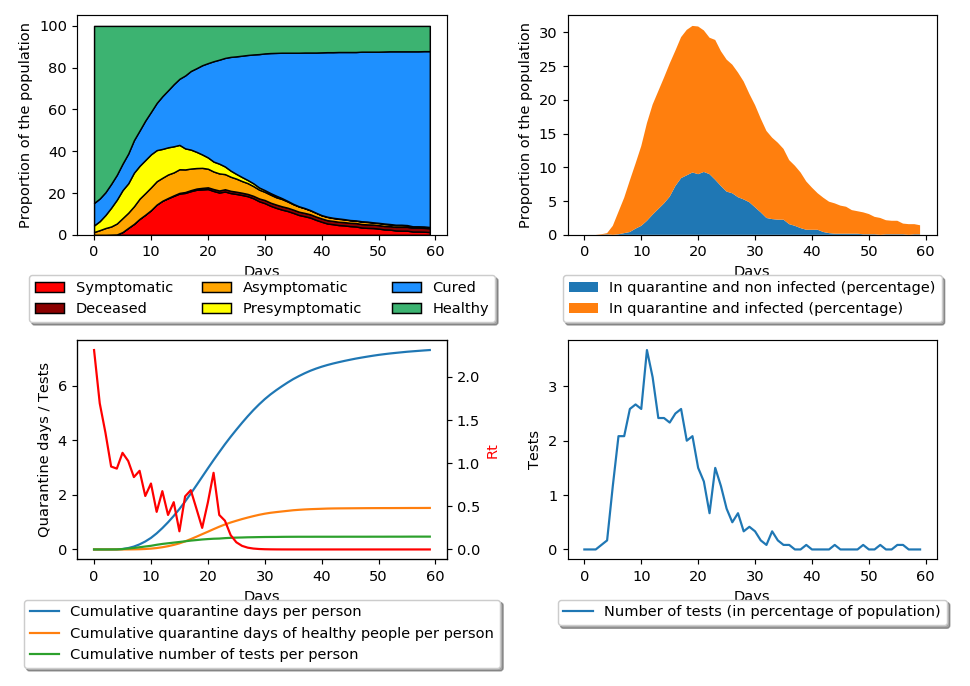

interactive(children=(FloatSlider(value=0.8, description='app_use_rate', max=1.0, step=0.01), FloatSlider(valu…

<function __main__.update_prob(app_use_rate, report_to_app, read_notif, warning_after_symptoms, quarantine_after_notification)>

In [11]:

%matplotlib notebook
import matplotlib.pyplot as plt

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[9,8])
axRt = ax3.twinx()

xs = []
y_D = []
y_MS = []
y_MPS = []
y_MAS = []
y_S = []
y_G = []
y_Q = []
y_InfectByASPS = []
y_QuarantineNonI = []
y_QuarantineI = []
y_QuarantineNonITotal = []
y_Test = []
y_TestTotal = []
y_Rt = []

ax.set_ylim([0, nbIndividuals])

def update_viz(graph):
    if y_QuarantineNonITotal != []:
        y_QuarantineNonITotal.append((graph.nbQuarantineNonI + nbIndividuals*y_QuarantineNonITotal[-1])/nbIndividuals)
        y_TestTotal.append((graph.nbTest + nbIndividuals*y_TestTotal[-1])/nbIndividuals)
    else:
        y_QuarantineNonITotal.append(graph.nbQuarantineNonI/nbIndividuals)
        y_TestTotal.append(graph.nbTest/nbIndividuals)

    xs.append(len(xs))
    y_D.append(graph.nbDead/nbIndividuals*100)
    y_MS.append(graph.nbS/nbIndividuals*100)
    y_MPS.append(graph.nbPS/nbIndividuals*100)
    y_MAS.append(graph.nbAS/nbIndividuals*100)
    y_S.append(graph.nbHealthy/nbIndividuals*100)
    y_G.append(graph.nbCured/nbIndividuals*100)
    y_Q.append(graph.nbQuarantineTotal)
    y_InfectByASPS.append(graph.nbInfectedByASPS)
    y_QuarantineNonI.append(graph.nbQuarantineNonI/nbIndividuals*100)
    y_QuarantineI.append(graph.nbQuarantineI/nbIndividuals*100)
    y_Test.append(graph.nbTest/nbIndividuals*100)

def draw_viz(graph):
    ax.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    axRt.clear()

    ax.set_xlabel("Days")
    ax2.set_xlabel("Days")
    ax3.set_xlabel("Days")
    ax4.set_xlabel("Days")

    # computing Rt | calcul de Rt
    for i in range(graph.stepNb):
        if graph.contaminations[i] != 0 and graph.contaminations[i] > 5: # we just take into account days where there were more than 5 contaminations to reduce random fluctuations
            y_Rt.append(graph.numInfectedByNewInfected[i]/graph.contaminations[i])
        else:
            y_Rt.append(0)
    for i in range(1, graph.stepNb-1): # smoothing Rt curve
        if y_Rt[i] == 0:
            y_Rt[i] = (y_Rt[i-1] + y_Rt[i+1])/2


    labels = [ "Symptomatic", "Deceased", "Asymptomatic","Presymptomatic", "Cured", "Healthy"]
    ax.stackplot(xs, y_MS, y_D, y_MAS,y_MPS, y_G, y_S, labels=labels, edgecolor="black", colors=["red", "darkred", "orange","yellow", "dodgerblue", "mediumseagreen"])
    ax.set_ylabel("Proportion of the population")

    labels2 = ["In quarantine and non infected (percentage)", "In quarantine and infected (percentage)"]
    ax2.stackplot(xs, y_QuarantineNonI, y_QuarantineI, labels=labels2)
    ax2.set_ylabel("Proportion of the population")
    #line, = ax3.plot(xs, y_InfectByASPS)
    #line.set_label("Total infections by asympt.")

    ax3.set_ylabel("Quarantine days / Tests")
    line, = ax3.plot(xs, y_Q)
    line.set_label("Cumulative quarantine days per person")
    line, = ax3.plot(xs, y_QuarantineNonITotal)
    line.set_label("Cumulative quarantine days of healthy people per person")
    line, = ax3.plot(xs, y_TestTotal)
    line.set_label("Cumulative number of tests per person")
    axRt.set_ylabel("Rt", color = 'red')
    line, = axRt.plot(xs, y_Rt, color = 'red')
    line.set_label("Rt (average number of infections caused by one infected)")

    line, = ax4.plot(xs, y_Test)
    line.set_label("Number of tests (in percentage of population)")
    ax4.set_ylabel("Tests")

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
    #ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
    #axRt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1) #to avoid legend on top of the other
    ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    plt.tight_layout()

def update_prob(app_use_rate, report_to_app, read_notif, warning_after_symptoms, quarantine_after_notification):
    global nbIndividuals
    global utilApp
    global pReport
    global pReadNotif
    global quarantineAfterNotification
    global warningAfterSymptoms
    global xs, y_D, y_MS, y_MPS, y_MAS, y_S, y_G, y_Q, y_InfectByASPS, y_Rt
    global y_QuarantineNonI, y_QuarantineNonITotal, y_QuarantineI, y_Test, y_TestTotal

    utilApp = app_use_rate
    pReport = report_to_app
    pReadNotif = read_notif
    warningAfterSymptoms = warning_after_symptoms
    quarantineAfterNotification = quarantine_after_notification
    nbSteps = 60

    nbIndividuals = 4000 # you may change the number of individuals for the exponential distribution graph here

    sys.stdout.write('\r' + "Creation of the graph ...")
    sys.stdout.flush()
    graph = Graph()
    init_graph_household(graph) # default graph generation using households structure, as shown in the Results section
    # uncomment this to get a graph with degrees following an exponential distribution
    #init_graph_exp(graph)
    
    sys.stdout.write('\r' + "                            ")
    sys.stdout.flush()
    
    xs.clear()
    y_D.clear()
    y_MS.clear()
    y_MPS.clear()
    y_MAS.clear()
    y_S.clear()
    y_G.clear()
    y_Q.clear()
    y_InfectByASPS.clear()
    y_QuarantineNonI.clear()
    y_QuarantineNonITotal.clear()
    y_QuarantineI.clear()
    y_Test.clear()
    y_TestTotal.clear()
    y_Rt.clear()

    maxSymp = 0
    for step_ind in range(nbSteps):
        # update matplotlib
        update_viz(graph)
        # update simulation
        step(graph)
        sys.stdout.write('\r'+'Progress: '+(str((100*step_ind/nbSteps))[:4]) + "%")
        sys.stdout.flush()
        maxSymp = max(maxSymp, graph.nbS)
        
    sys.stdout.write('\r' + "                     ")
    sys.stdout.flush()
    #usefull information to decomment if a more precise evaluation is needed
    # print("Total individuals:", nbIndividuals)
    # print("Number of deceased:", graph.nbDead)
    # print("Max. nb of symptomatic people:", maxSymp)
    # print("Test per people:", y_TestTotal[-1])
    # print("Final healthy:", y_S[-1])
    #print(maxSymp/nbIndividuals,",", y_S[-1],",", y_Q[-1], ",", y_TestTotal[-1])
    draw_viz(graph)
    plt.show()


update_prob(utilApp, pReport, pReadNotif, warningAfterSymptoms, quarantineAfterNotification)

interact_manual(update_prob, \
                 app_use_rate = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=utilApp), \
                 report_to_app = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=pReport), \
                 read_notif = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=pReadNotif), \
                 warning_after_symptoms = widgets.Checkbox(value=warningAfterSymptoms), \
                 quarantine_after_notification = widgets.Checkbox(value=quarantineAfterNotification))
